In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Loan Eligibility Prediction.csv")

In [4]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [8]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
df['Gender'].value_counts()

Male      499
Female    115
Name: Gender, dtype: int64

In [11]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [12]:
df['Married'].value_counts()

Yes    399
No     215
Name: Married, dtype: int64

In [13]:
df.replace({'Married':{'No':0,'Yes':1}},inplace=True)

In [14]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)

In [18]:
df['Self_Employed'].value_counts()

No     523
Yes     91
Name: Self_Employed, dtype: int64

In [19]:
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)

In [20]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [22]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [24]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,1,0,0,1,0,2378,0.0,9,360,1,2,0
1,15,0,1,2,1,0,1299,1086.0,17,120,1,2,1
2,95,0,0,0,0,0,3620,0.0,25,120,1,1,1
3,134,0,1,0,1,1,3459,0.0,25,120,1,1,1
4,556,0,1,1,1,0,5468,1032.0,26,360,1,1,1


In [25]:
y=df['Loan_Status']

In [26]:
y.shape

(614,)

In [27]:
y

0      0
1      1
2      1
3      1
4      1
      ..
609    0
610    0
611    0
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [28]:
X=df.drop(['Loan_Status','Customer_ID'],axis=1)

In [29]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,2378,0.0,9,360,1,2
1,0,1,2,1,0,1299,1086.0,17,120,1,2
2,0,0,0,0,0,3620,0.0,25,120,1,1
3,0,1,0,1,1,3459,0.0,25,120,1,1
4,0,1,1,1,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,2947,1603.0,10,360,1,2
610,0,0,0,1,0,4680,2087.0,15,360,1,1
611,0,1,2,1,1,6633,0.0,25,360,0,0
612,0,1,1,0,0,2492,2375.0,30,360,1,0


In [30]:
X.shape

(614, 11)

In [31]:
#get x variable standardized

In [34]:
X_std=X[['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']]

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [37]:
X_std=ss.fit_transform(X_std)

In [38]:
X_std

array([[-0.49564665, -0.55448733, -1.52878429,  0.30300926],
       [-0.6724141 , -0.18306108, -1.4368431 , -3.14231829],
       [-0.29217568, -0.55448733, -1.34490192, -3.14231829],
       ...,
       [ 0.20142983, -0.55448733, -1.34490192,  0.30300926],
       [-0.47697057,  0.25779382, -1.28743867,  0.30300926],
       [-0.49204249,  0.74516252, -1.34490192, -2.2809864 ]])

In [39]:
X[['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']]=pd.DataFrame(X_std,columns=['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'])

In [40]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,-0.495647,-0.554487,-1.528784,0.303009,1,2
1,0,1,2,1,0,-0.672414,-0.183061,-1.436843,-3.142318,1,2
2,0,0,0,0,0,-0.292176,-0.554487,-1.344902,-3.142318,1,1
3,0,1,0,1,1,-0.318552,-0.554487,-1.344902,-3.142318,1,1
4,0,1,1,1,0,0.010573,-0.201530,-1.333409,0.303009,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,-0.402430,-0.006240,-1.517292,0.303009,1,2
610,0,0,0,1,0,-0.118521,0.159294,-1.459828,0.303009,1,1
611,0,1,2,1,1,0.201430,-0.554487,-1.344902,0.303009,0,0
612,0,1,1,0,0,-0.476971,0.257794,-1.287439,0.303009,1,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529,stratify=y)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((429, 11), (185, 11), (429,), (185,))

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier(random_state=2539,max_depth=3)

In [47]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2539)

In [48]:
y_pred=dt.predict(X_test)

In [49]:
y_pred.shape

(185,)

In [50]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
dt.predict_proba(X_test)

array([[0.1547619 , 0.8452381 ],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.85294118, 0.14705882],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.85294118, 0.14705882],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [1.

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.38      0.52        58
           1       0.77      0.97      0.86       127

    accuracy                           0.78       185
   macro avg       0.81      0.67      0.69       185
weighted avg       0.80      0.78      0.75       185



In [57]:
print(confusion_matrix(y_test,y_pred))

[[ 22  36]
 [  4 123]]


In [58]:
#get decision tree plot

In [59]:
from sklearn.tree import plot_tree

In [60]:
import matplotlib.pyplot as plt

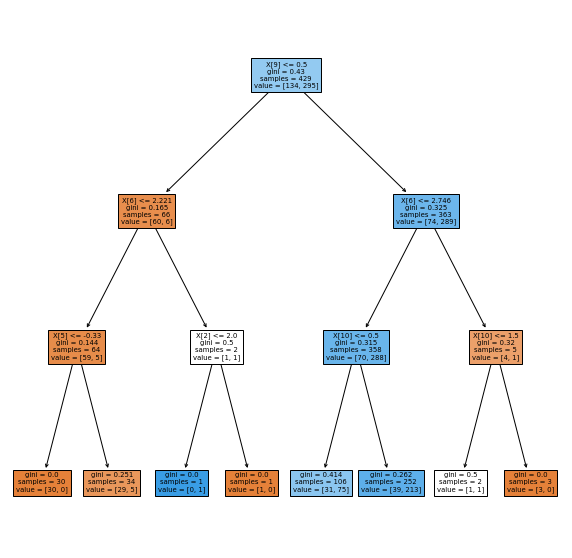

In [76]:
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True)
plt.show()

In [70]:
#check prediction is right or not

In [66]:
X_new=X.sample(1)

In [67]:
X_new

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
434,0,1,1,1,1,-0.320026,0.156558,0.229591,0.303009,1,1


In [68]:
dt.predict(X_new)

array([1], dtype=int64)

In [75]:
df.iloc[434:435,:13]#loan_status =1 is === our prediction

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
434,471,0,1,1,1,1,3450,2079.0,162,360,1,1,1
